In [ ]:
#---Technical Seminar

#---Twitter Sentimental Analysis

#---Name: Khushil M Sindhwad
#---USN:  1BM19CS072
#---Sec:  4th Sem CSE B

#the modules used for the sentimental analysis
from textblob import TextBlob
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
posts=pd.read_csv("trumptweets.csv",nrows=100)['content']
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
  print(tweet + '\n')

Show the 5 recent tweets:

Be sure to tune in and watch Donald Trump on Late Night with David Letterman as he presents the Top Ten List tonight!

Donald Trump will be appearing on The View tomorrow morning to discuss Celebrity Apprentice and his new book Think Like A Champion!

Donald Trump reads Top Ten Financial Tips on Late Show with David Letterman: http://tinyurl.com/ooafwn - Very funny!

New Blog Post: Celebrity Apprentice Finale and Lessons Learned Along the Way: http://tinyurl.com/qlux5e

"My persona will never be that of a wallflower - I’d rather build walls than cling to them" --Donald J. Trump



In [ ]:
# passing the data to the data frame of panda
df = pd.DataFrame([tweet for tweet in posts], columns=['Tweets'])
df.head()

,Tweets
0,Be sure to tune in and watch Donald Trump on L...
1,Donald Trump will be appearing on The View tom...
2,Donald Trump reads Top Ten Financial Tips on L...
3,New Blog Post: Celebrity Apprentice Finale and...
4,"""My persona will never be that of a wallflower..."


In [ ]:
# The function to remove all the irrelavant parts of the tweet.
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#' hash tag
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text


# Applying the function on all the tweets.
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# To display the changes
df

In [ ]:
# function to get the subjectivity of the tweet
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# function to get the polarity of the tweet
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# creating two columns in the data to place the subjectivity and polarity of the tweet
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df

,Tweets,Subjectivity,Polarity
0,Be sure to tune in and watch Donald Trump on L...,0.497222,0.175000
1,Donald Trump will be appearing on The View tom...,0.454545,0.170455
2,Donald Trump reads Top Ten Financial Tips on L...,0.420000,0.121250
3,New Blog Post: Celebrity Apprentice Finale and...,0.454545,0.136364
4,"""My persona will never be that of a wallflower...",0.000000,0.000000
...,...,...,...
95,We're all very happy to hear of Bret Michael's...,0.616667,0.783333
96,"Looking forward to the 2010 Miss USA Pageant, ...",0.500000,0.136364
97,"Congratulations to our new Miss USA, the beaut...",0.818182,0.662121
98,Put this on your calendar: The Celebrity Appre...,0.250000,0.068182


In [ ]:
# tag allotment for each tweet based on the polariy
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
# Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,Be sure to tune in and watch Donald Trump on L...,0.497222,0.175000,Positive
1,Donald Trump will be appearing on The View tom...,0.454545,0.170455,Positive
2,Donald Trump reads Top Ten Financial Tips on L...,0.420000,0.121250,Positive
3,New Blog Post: Celebrity Apprentice Finale and...,0.454545,0.136364,Positive
4,"""My persona will never be that of a wallflower...",0.000000,0.000000,Neutral
...,...,...,...,...
95,We're all very happy to hear of Bret Michael's...,0.616667,0.783333,Positive
96,"Looking forward to the 2010 Miss USA Pageant, ...",0.500000,0.136364,Positive
97,"Congratulations to our new Miss USA, the beaut...",0.818182,0.662121,Positive
98,Put this on your calendar: The Celebrity Appre...,0.250000,0.068182,Positive


In [ ]:
# to produce the counts of the data
df['Analysis'].value_counts()

Positive    62
Neutral     33
Negative     5
Name: Analysis, dtype: int64

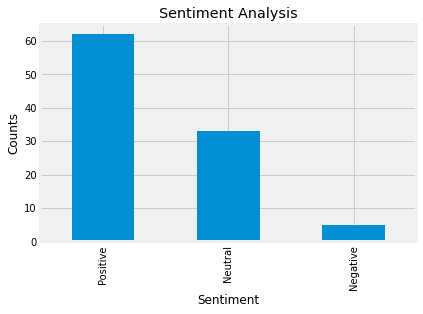

In [ ]:
#To produce the graph for proper data visualization 
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind = 'bar')
plt.show()